# Please ignore Questions 1 and 2 parts and start reviewing Question 3 below

# Question 1

For this assignment, you will be required to explore and cluster the neighborhoods in Toronto.

1. Start by creating a new Notebook for this assignment.
2. Use the Notebook to build the code to scrape the following Wikipedia page, 

https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, 

in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe.

3. To create the above dataframe:

a. The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood

b. Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.

c. More than one neighborhood can exist in one postal code area. 
For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. 
These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.

d. If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough. 
So for the 9th cell in the table on the Wikipedia page, the value of the Borough and the Neighborhood columns will be Queen's Park.

e. Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.

e. In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.

4. Submit a link to your Notebook on your Github repository. (10 marks)

Note: There are different website scraping libraries and packages in Python. For scraping the above table, you can simply use pandas to read the table into a pandas dataframe.

Another way, which would help to learn for more complicated cases of web scraping is using the BeautifulSoup package. Here is the package's main documentation page: http://beautiful-soup-4.readthedocs.io/en/latest/

The package is so popular that there is a plethora of tutorials and examples on how to use it. Here is a very good Youtube video on how to use the BeautifulSoup package: https://www.youtube.com/watch?v=ng2o98k983k

Use pandas, or the BeautifulSoup package, or any other way you are comfortable with to transform the data in the table on the Wikipedia page into the above pandas dataframe.

__read the Wikipedia page of postal codes of Canada using pandas__

In [1]:
import pandas as pd

#header=0 tells pandas to use the first row as column names
tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M", header=0)

#tables[0] contain our postal codes data
print("The shape is : ", tables[0].shape)
tables[0].head()

The shape is :  (288, 3)


,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


Only process the cells that have an assigned borough. 

Ignore cells with a borough that is Not assigned.

In [2]:
toronto_postal_info = tables[0][tables[0]["Borough"] != "Not assigned"]

#rename Postcode and Neighbourhood columns to PostalCode and Neighborhood
toronto_postal_info.rename(columns={"Postcode":"PostalCode", "Neighbourhood":"Neighborhood"}, inplace=True)
toronto_postal_info.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,PostalCode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights


More than one neighborhood can exist in one postal code area. 

For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. 

These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.

In [3]:
#combine mutiple neighborhoods separated by a comma for the same PostalCode
postal_code_neigh_series = toronto_postal_info.groupby(['PostalCode'])['Neighborhood'].apply(lambda neigh: ','.join(neigh))

#convert above series to pandas df
postal_code_neigh_df = pd.DataFrame(postal_code_neigh_series).reset_index()
postal_code_neigh_df.head()

,PostalCode,Neighborhood
0,M1B,"Rouge,Malvern"
1,M1C,"Highland Creek,Rouge Hill,Port Union"
2,M1E,"Guildwood,Morningside,West Hill"
3,M1G,Woburn
4,M1H,Cedarbrae


If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough. 

So for the 9th cell in the table on the Wikipedia page, the value of the Borough and the Neighborhood columns will be Queen's Park.

In [4]:
#first check how many rows have Not assigned neighborhood
neigh_not_assignd = toronto_postal_info[toronto_postal_info["Neighborhood"] == "Not assigned"]
neigh_not_assignd.shape

(1, 3)

In [5]:
#display neigh_not_assignd
neigh_not_assignd

,PostalCode,Borough,Neighborhood
8,M7A,Queen's Park,Not assigned


In [7]:
#now make neighborhood the same as the borough for rows that have Not assigned neighborhood (only 1 row is such, but below code is for a general case of multiple rows)
import numpy as np

print("Before change: ", toronto_postal_info.loc[8])

toronto_postal_info['Neighborhood'] = np.where(toronto_postal_info.Neighborhood == "Not assigned",toronto_postal_info.Borough,toronto_postal_info.Neighborhood)

print("After change: ", toronto_postal_info.loc[8])

Before change:  PostalCode               M7A
Borough         Queen's Park
Neighborhood    Queen's Park
Name: 8, dtype: object
After change:  PostalCode               M7A
Borough         Queen's Park
Neighborhood    Queen's Park
Name: 8, dtype: object


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


now append postal_code_neigh_df to toronto_postal_info so we can have combined mutiple neighborhoods separated by a comma for the same PostalCode

In [8]:
toronto_postal_info_init = pd.merge(toronto_postal_info, postal_code_neigh_df, on='PostalCode', suffixes=('_1', '_2'))

#we need to replace Not assigned value in Neighborhood_2 column with respective value in Neighborhood_1 column
print("Before change: ", toronto_postal_info_init.loc[6])

toronto_postal_info_init['Neighborhood_2'] = np.where(toronto_postal_info_init.Neighborhood_2 == "Not assigned",toronto_postal_info_init.Neighborhood_1,toronto_postal_info_init.Neighborhood_2)

print("After change: ", toronto_postal_info_init.loc[6])

toronto_postal_info_init.head(20)

Before change:  PostalCode                 M7A
Borough           Queen's Park
Neighborhood_1    Queen's Park
Neighborhood_2    Not assigned
Name: 6, dtype: object
After change:  PostalCode                 M7A
Borough           Queen's Park
Neighborhood_1    Queen's Park
Neighborhood_2    Queen's Park
Name: 6, dtype: object


,PostalCode,Borough,Neighborhood_1,Neighborhood_2
0,M3A,North York,Parkwoods,Parkwoods
1,M4A,North York,Victoria Village,Victoria Village
2,M5A,Downtown Toronto,Harbourfront,"Harbourfront,Regent Park"
3,M5A,Downtown Toronto,Regent Park,"Harbourfront,Regent Park"
4,M6A,North York,Lawrence Heights,"Lawrence Heights,Lawrence Manor"
5,M6A,North York,Lawrence Manor,"Lawrence Heights,Lawrence Manor"
6,M7A,Queen's Park,Queen's Park,Queen's Park
7,M9A,Etobicoke,Islington Avenue,Islington Avenue
8,M1B,Scarborough,Rouge,"Rouge,Malvern"
9,M1B,Scarborough,Malvern,"Rouge,Malvern"


__Final dataframe__

In [9]:
#drop Neighborhood_1 column since we will use Neighborhood_2 column
toronto_postal_info_init.drop(columns=['Neighborhood_1'], axis=1, inplace=True)
#rename Neighborhood_2 column to Neighborhood
toronto_postal_info_init.rename(columns={'Neighborhood_2':'Neighborhood'}, inplace=True)
#keep unique rows and reset the index
toronto_postal_info_final= toronto_postal_info_init.drop_duplicates().reset_index(drop=True)
toronto_postal_info_final.head(20)

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Harbourfront,Regent Park"
3,M6A,North York,"Lawrence Heights,Lawrence Manor"
4,M7A,Queen's Park,Queen's Park
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Rouge,Malvern"
7,M3B,North York,Don Mills North
8,M4B,East York,"Woodbine Gardens,Parkview Hill"
9,M5B,Downtown Toronto,"Ryerson,Garden District"


In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe

In [10]:
print("The number of rows is: ",toronto_postal_info_final.shape[0])

The number of rows is:  103


# Question 2

Now that you have built a dataframe of the postal code of each neighborhood along with the borough name and neighborhood name, in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood.

In an older version of this course, we were leveraging the Google Maps Geocoding API to get the latitude and the longitude coordinates of each neighborhood. However, recently Google started charging for their API: http://geoawesomeness.com/developers-up-in-arms-over-google-maps-api-insane-price-hike/, so we will use the Geocoder Python package instead: https://geocoder.readthedocs.io/index.html.

The problem with this Package is you have to be persistent sometimes in order to get the geographical coordinates of a given postal code. So you can make a call to get the latitude and longitude coordinates of a given postal code and the result would be None, and then make the call again and you would get the coordinates. So, in order to make sure that you get the coordinates for all of our neighborhoods, you can run a while loop for each postal code. 

Given that this package can be very unreliable, in case you are not able to get the geographical coordinates of the neighborhoods using the Geocoder package, here is a link to a csv file that has the geographical coordinates of each postal code: http://cocl.us/Geospatial_data

Use the Geocoder package or the csv file to create the dataframe.

__Read Geospatial_Coordinates.csv into a pandas dataframe__

In [11]:
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials = {
    'IAM_SERVICE_ID': 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx',
    'IBM_API_KEY_ID': 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx',
    'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.ng.bluemix.net/oidc/token',
    'BUCKET': 'myproject-donotdelete-pr-sndcpzislvwjid',
    'FILE': 'Geospatial_Coordinates.csv'
}

In [12]:
from ibm_botocore.client import Config
import ibm_boto3
cos = ibm_boto3.client(service_name='s3',
    ibm_api_key_id=credentials['IBM_API_KEY_ID'],
    ibm_service_instance_id=credentials['IAM_SERVICE_ID'],
    ibm_auth_endpoint=credentials['IBM_AUTH_ENDPOINT'],
    config=Config(signature_version='oauth'),
    endpoint_url=credentials['ENDPOINT'])

In [13]:
from ibm_botocore.client import Config
import ibm_boto3
def download_file_cos(credentials,local_file_name,key):  
    cos = ibm_boto3.client(service_name='s3',
    ibm_api_key_id=credentials['IBM_API_KEY_ID'],
    ibm_service_instance_id=credentials['IAM_SERVICE_ID'],
    ibm_auth_endpoint=credentials['IBM_AUTH_ENDPOINT'],
    config=Config(signature_version='oauth'),
    endpoint_url=credentials['ENDPOINT'])
    try:
        res=cos.download_file(Bucket=credentials['BUCKET'],Key=key,Filename=local_file_name)
    except Exception as e:
        print(Exception, e)
    else:
        print('File Downloaded')

In [14]:
cos.download_file(Bucket=credentials['BUCKET'],Key='Geospatial_Coordinates.csv',Filename='Geospatial_Coordinates1.csv')

import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
geo_spatial_data = pd.read_csv("Geospatial_Coordinates1.csv") 
# Preview the first 5 lines of the loaded data 
geo_spatial_data.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


geo_spatial_data df has the same number of rows as toronto_postal_info_final

In [15]:
print("The number of rows in geo_spatial_data is ", geo_spatial_data.shape[0])
print("The number of rows toronto_postal_info_final is ",toronto_postal_info_final.shape[0])

The number of rows in geo_spatial_data is  103
The number of rows toronto_postal_info_final is  103


__Append Latitude and	Longitude to toronto_postal_info_final and create toronto_postal_info_final2 df__

In [16]:
#first in geo_spatial_data df we rename Postal Code to PostalCode 
geo_spatial_data.rename(columns={'Postal Code':'PostalCode'}, inplace=True)
    
#then we merge toronto_postal_info_final and geo_spatial_data on PostalCode
toronto_postal_info_final2 = pd.merge(toronto_postal_info_final, geo_spatial_data, on='PostalCode')
toronto_postal_info_final2.head(20)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Harbourfront,Regent Park",43.654260,-79.360636
3,M6A,North York,"Lawrence Heights,Lawrence Manor",43.718518,-79.464763
4,M7A,Queen's Park,Queen's Park,43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
7,M3B,North York,Don Mills North,43.745906,-79.352188
8,M4B,East York,"Woodbine Gardens,Parkview Hill",43.706397,-79.309937
9,M5B,Downtown Toronto,"Ryerson,Garden District",43.657162,-79.378937


In [17]:
#there are no missing values in the toronto_postal_info_final2
toronto_postal_info_final2.isnull().sum()

PostalCode      0
Borough         0
Neighborhood    0
Latitude        0
Longitude       0
dtype: int64

In [18]:
#the number of rows is also preserved
print("The number of rows toronto_postal_info_final2 is ",toronto_postal_info_final2.shape[0])

The number of rows toronto_postal_info_final2 is  103


# Question 3

Explore and cluster the neighborhoods in Toronto. You can decide to work with only boroughs that contain the word Toronto and then replicate the same analysis we did to the New York City data. It is up to you.

Just make sure:

1. to add enough Markdown cells to explain what you decided to do and to report any observations you make.
2. to generate maps to visualize your neighborhoods and how they cluster together.

In [19]:
#let's download all the dependencies that we will need.
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

# 1. Explore Toronto dataset

__Use geopy library to get the latitude and longitude values of Toronto__

In [20]:
address = 'Toronto, CA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


__Create a map of Toronto with neighborhoods superimposed on top__

In [21]:
# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_postal_info_final2['Latitude'], toronto_postal_info_final2['Longitude'], toronto_postal_info_final2['Borough'], toronto_postal_info_final2['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

__Define Foursquare Credentials and Version__

In [52]:
CLIENT_ID = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx' # your Foursquare ID
CLIENT_SECRET = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
CLIENT_SECRET:xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


__Let's explore the first neighborhood in our dataframe__

In [23]:
toronto_postal_info_final2.loc[0, 'Neighborhood']

'Parkwoods'

Get the neighborhood's latitude and longitude values.

In [24]:
neighborhood_latitude = toronto_postal_info_final2.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = toronto_postal_info_final2.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = toronto_postal_info_final2.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Parkwoods are 43.7532586, -79.3296565.


__Now, let's get the top 100 venues that are in Parkwoods within a radius of 500 meters__

First, let's create the GET request URL.

In [25]:
LIMIT = 100
radius=500
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=AL5OA3E5YV4B3QZDB0H5A3HXRKZNLKLITZ0HOL4IOWDCFYKF&client_secret=J4YITWCUGYRNOBPROCPLUUWE34Z0E1RIOFG0U2CKGYULA32N&ll=43.653963,-79.387207&v=20180605&radius=500&limit=100'

Send the GET request and examine the results

In [26]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d9ffb5192e7a9002c4249fb'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Bay Street Corridor',
  'headerFullLocation': 'Bay Street Corridor, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 78,
  'suggestedBounds': {'ne': {'lat': 43.6584630045, 'lng': -79.38099903084075},
   'sw': {'lat': 43.649462995499995, 'lng': -79.39341496915925}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5227bb01498e17bf485e6202',
       'name': 'Downtown Toronto',
       'location': {'lat': 43.65323167517444,
        'lng': -79.38529600606677,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.65323167517444,
          

Let's borrow the get_category_type function from the Foursquare lab.

In [27]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a pandas dataframe.

In [28]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Downtown Toronto,Neighborhood,43.653232,-79.385296
1,Japango,Sushi Restaurant,43.655268,-79.385165
2,Cafe Plenty,Café,43.654571,-79.389450
3,Sansotei Ramen 三草亭,Ramen Restaurant,43.655157,-79.386501
4,Tsujiri,Tea Room,43.655374,-79.385354


How many venues were returned by Foursquare?

In [29]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

78 venues were returned by Foursquare.


# 2. Explore Neighborhoods in Toronto

__Let's create a function to repeat the same process to all the neighborhoods in Toronto__

In [30]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

__Run the above function on each neighborhood and create a new dataframe called toronto_venues__

In [31]:
toronto_venues = getNearbyVenues(names=toronto_postal_info_final2['Neighborhood'],
                                   latitudes=toronto_postal_info_final2['Latitude'],
                                   longitudes=toronto_postal_info_final2['Longitude']
                                  )

Parkwoods
Victoria Village
Harbourfront,Regent Park
Lawrence Heights,Lawrence Manor
Queen's Park
Islington Avenue
Rouge,Malvern
Don Mills North
Woodbine Gardens,Parkview Hill
Ryerson,Garden District
Glencairn
Cloverdale,Islington,Martin Grove,Princess Gardens,West Deane Park
Highland Creek,Rouge Hill,Port Union
Flemingdon Park,Don Mills South
Woodbine Heights
St. James Town
Humewood-Cedarvale
Bloordale Gardens,Eringate,Markland Wood,Old Burnhamthorpe
Guildwood,Morningside,West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor,Downsview North,Wilson Heights
Thorncliffe Park
Adelaide,King,Richmond
Dovercourt Village,Dufferin
Scarborough Village
Fairview,Henry Farm,Oriole
Northwood Park,York University
East Toronto
Harbourfront East,Toronto Islands,Union Station
Little Portugal,Trinity
East Birchmount Park,Ionview,Kennedy Park
Bayview Village
CFB Toronto,Downsview East
The Danforth West,Riverdale
Design E

__Let's check the size of the resulting dataframe__

In [32]:
print(toronto_venues.shape)
toronto_venues.head()

(2262, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Parkwoods,43.753259,-79.329656,TTC stop - 44 Valley Woods,43.755402,-79.333741,Bus Stop
3,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop


Let's check how many venues were returned for each neighborhood

In [33]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide,King,Richmond",100,100,100,100,100,100
Agincourt,4,4,4,4,4,4
"Agincourt North,L'Amoreaux East,Milliken,Steeles East",3,3,3,3,3,3
"Albion Gardens,Beaumond Heights,Humbergate,Jamestown,Mount Olive,Silverstone,South Steeles,Thistletown",8,8,8,8,8,8
"Alderwood,Long Branch",9,9,9,9,9,9
"Bathurst Manor,Downsview North,Wilson Heights",20,20,20,20,20,20
Bayview Village,4,4,4,4,4,4
"Bedford Park,Lawrence Manor East",23,23,23,23,23,23
Berczy Park,58,58,58,58,58,58


__Let's find out how many unique categories can be curated from all the returned venues__

In [34]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 274 uniques categories.


# 3. Analyze Each Neighborhood

In [35]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column which is 84 columns from back to the first column
fixed_columns = [toronto_onehot.columns[-83]] + list(toronto_onehot.columns[0:191]) + list(toronto_onehot.columns[192:275])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head(10)

,Neighborhood,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Luggage Store,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motel,Movie Theater,Moving Target,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Transportation Service,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Parkwoods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

 examine the new dataframe size

In [36]:
toronto_onehot.shape

(2262, 274)

__Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category__

In [37]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Luggage Store,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motel,Movie Theater,Moving Target,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Transportation Service,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,"Adelaide,King,Richmond",0.000000,0.000000,0.0000,0.0000,0

__Let's confirm the new size__

In [38]:
toronto_grouped.shape

(99, 274)

__Let's print each neighborhood along with the top 5 most common venues__

In [39]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide,King,Richmond----
                 venue  freq
0          Coffee Shop  0.08
1                 Café  0.05
2                  Bar  0.04
3  American Restaurant  0.04
4      Thai Restaurant  0.04


----Agincourt----
                       venue  freq
0             Sandwich Place  0.25
1             Breakfast Spot  0.25
2                     Lounge  0.25
3               Skating Rink  0.25
4  Middle Eastern Restaurant  0.00


----Agincourt North,L'Amoreaux East,Milliken,Steeles East----
                 venue  freq
0           Playground  0.33
1          Coffee Shop  0.33
2                 Park  0.33
3   Mexican Restaurant  0.00
4  Monument / Landmark  0.00


----Albion Gardens,Beaumond Heights,Humbergate,Jamestown,Mount Olive,Silverstone,South Steeles,Thistletown----
                 venue  freq
0        Grocery Store  0.25
1             Pharmacy  0.12
2           Beer Store  0.12
3  Fried Chicken Joint  0.12
4       Sandwich Place  0.12


----Alderwood,Long Branch----
        

__Let's put that into a pandas dataframe__

borrow below function from the Lab

In [40]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

create the new dataframe and display the top 10 venues for each neighborhood

In [41]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide,King,Richmond",Coffee Shop,Café,Thai Restaurant,Bar,American Restaurant,Hotel,Restaurant,Burger Joint,Steakhouse,Sushi Restaurant
1,Agincourt,Lounge,Sandwich Place,Breakfast Spot,Skating Rink,Dumpling Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Electronics Store
2,"Agincourt North,L'Amoreaux East,Milliken,Steel...",Playground,Park,Coffee Shop,Yoga Studio,Drugstore,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop
3,"Albion Gardens,Beaumond Heights,Humbergate,Jam...",Grocery Store,Pharmacy,Fried Chicken Joint,Pizza Place,Sandwich Place,Beer Store,Fast Food Restaurant,Golf Course,Deli / Bodega,Electronics Store
4,"Alderwood,Long Branch",Pizza Place,Pharmacy,Skating Rink,Coffee Shop,Pool,Pub,Sandwich Place,Gym,Airport Terminal,Farmers Market


# 4.  Cluster Neighborhoods

Run k-means to cluster the neighborhood into clusters.

Determine the optimal number of clusters for k-means clustering using the Elbow Method (as per https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f)

In [43]:
Sum_of_squared_distances = []

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

K = range(1,25)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(toronto_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)
    
Sum_of_squared_distances

[18.23220396855338,
 16.174805198931136,
 15.191095202444094,
 14.22551538881674,
 13.2223359248267,
 13.336559705890311,
 12.604352445434392,
 11.990389970742573,
 11.528430558561144,
 11.360303879894305,
 10.75344802406098,
 10.106053960414346,
 9.966339730924567,
 9.852608749418396,
 9.194723425060957,
 8.960904618452123,
 8.523861220658063,
 8.563712740998515,
 8.143085344273889,
 7.740759732843231,
 7.524046798739108,
 7.204869541944935,
 6.874555693196401,
 6.741370665812047]

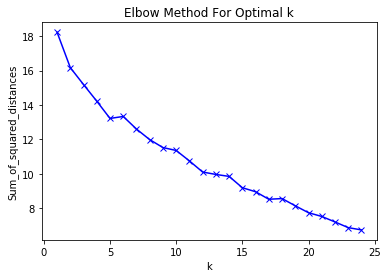

In [45]:
import matplotlib.pyplot as plt

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')

plt.show()

It seems the optimal k for this dataset is 16

In [46]:
# set number of clusters
kclusters = 16

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20] 

array([1, 1, 4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1],
      dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [47]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_postal_info_final2

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head(20) # check the 6th column for the cluster label!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,4.0,Food & Drink Shop,Bus Stop,Park,Dumpling Restaurant,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Yoga Studio
1,M4A,North York,Victoria Village,43.725882,-79.315572,1.0,Pizza Place,French Restaurant,Coffee Shop,Hockey Arena,Portuguese Restaurant,Yoga Studio,Drugstore,Diner,Discount Store,Dog Run
2,M5A,Downtown Toronto,"Harbourfront,Regent Park",43.654260,-79.360636,1.0,Coffee Shop,Park,Bakery,Café,Breakfast Spot,Restaurant,Pub,Mexican Restaurant,Theater,Yoga Studio
3,M6A,North York,"Lawrence Heights,Lawrence Manor",43.718518,-79.464763,1.0,Clothing Store,Furniture / Home Store,Accessories Store,Boutique,Shoe Store,Miscellaneous Shop,Event Space,Vietnamese Restaurant,Coffee Shop,Convenience Store
4,M7A,Queen's Park,Queen's Park,43.662301,-79.389494,1.0,Coffee Shop,Diner,Gym,Park,Burger Joint,Yoga Studio,Italian Restaurant,Seafood Restaurant,Sandwich Place,Salad Place
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353,2.0,Fast Food Restaurant,Dumpling Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,Hardware Store
7,M3B,North York,Don Mills North,43.745906,-79.352188,1.0,Café,Basketball Court,Japanese Restaurant,Gym / Fitness Center,Caribbean Restaurant,Baseball Field,Dog Run,Doner Restaurant,Donut Shop,Drugstore
8,M4B,East York,"Woodbine Gardens,Parkview Hill",43.706397,-79.309937,1.0,Fast Food Restaurant,Pizza Place,Gastropub,Breakfast Spot,Bank,Intersection,Athletics & Sports,Pharmacy,Gym / Fitness Center,Convenience Store
9,M5B,Downtown Toronto,"Ryerson,Garden District",43.657162,-79.378937,1.0,Coffee Shop,Clothing Store,Cosmetics Shop,Fast Food Restaurant,Middle Eastern Restaurant,Café,Italian Restaurant,Bakery,Sporting Goods Shop,Pizza Place


check if some Neighborhood was not assigned to any cluster

In [48]:
toronto_merged.isnull().sum()

PostalCode                0
Borough                   0
Neighborhood              0
Latitude                  0
Longitude                 0
Cluster Labels            4
1st Most Common Venue     4
2nd Most Common Venue     4
3rd Most Common Venue     4
4th Most Common Venue     4
5th Most Common Venue     4
6th Most Common Venue     4
7th Most Common Venue     4
8th Most Common Venue     4
9th Most Common Venue     4
10th Most Common Venue    4
dtype: int64

In [49]:
#as we can see 4 Neighborhoods were not assigned to any cluster and it looks because they did not have any venue
no_venues_neigh = toronto_merged[toronto_merged['Cluster Labels'].isnull()]
no_venues_neigh

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,M2L,North York,"Silver Hills,York Mills",43.757490,-79.374714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,M2M,North York,"Newtonbrook,Willowdale",43.789053,-79.408493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,M1X,Scarborough,Upper Rouge,43.836125,-79.205636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
#we will remove above 4 Neighborhoods
toronto_merged=toronto_merged.dropna()
toronto_merged.isnull().sum()

PostalCode                0
Borough                   0
Neighborhood              0
Latitude                  0
Longitude                 0
Cluster Labels            0
1st Most Common Venue     0
2nd Most Common Venue     0
3rd Most Common Venue     0
4th Most Common Venue     0
5th Most Common Venue     0
6th Most Common Venue     0
7th Most Common Venue     0
8th Most Common Venue     0
9th Most Common Venue     0
10th Most Common Venue    0
dtype: int64

visualize the resulting clusters

In [51]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# 5. Examine Clusters

__Cluster 1__: Bakery

In [74]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,North York,0.0,Italian Restaurant,Park,Bakery,Japanese Restaurant,Pub,Yoga Studio,Donut Shop,Discount Store,Dog Run,Doner Restaurant
31,West Toronto,0.0,Pharmacy,Bakery,Supermarket,Gym / Fitness Center,Music Venue,Portuguese Restaurant,Café,Middle Eastern Restaurant,Brewery,Bar
44,Scarborough,0.0,Bus Line,Bakery,Fast Food Restaurant,Intersection,Metro Station,Bus Station,Soccer Field,Park,Cosmetics Shop,Construction & Landscaping
49,North York,0.0,Basketball Court,Park,Bakery,Construction & Landscaping,Yoga Studio,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant


__Cluster 2__: Cafe

In [75]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,North York,1.0,Café,Basketball Court,Japanese Restaurant,Gym / Fitness Center,Caribbean Restaurant,Baseball Field,Dog Run,Doner Restaurant,Donut Shop,Drugstore
25,Downtown Toronto,1.0,Grocery Store,Café,Park,Nightclub,Convenience Store,Baby Store,Diner,Restaurant,Italian Restaurant,Coffee Shop
39,North York,1.0,Café,Japanese Restaurant,Bank,Chinese Restaurant,Diner,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant
43,West Toronto,1.0,Café,Breakfast Spot,Coffee Shop,Pet Store,Caribbean Restaurant,Stadium,Burrito Place,Sandwich Place,Restaurant,Climbing Gym
58,Scarborough,1.0,Café,General Entertainment,Skating Rink,College Stadium,Concert Hall,Diner,Falafel Restaurant,Event Space,Ethiopian Restaurant,Empanada Restaurant
71,Scarborough,1.0,Auto Garage,Breakfast Spot,Middle Eastern Restaurant,Bakery,Shopping Mall,Sandwich Place,Drugstore,Dog Run,Doner Restaurant,Donut Shop
78,Scarborough,1.0,Lounge,Sandwich Place,Breakfast Spot,Skating Rink,Dumpling Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Electronics Store
80,Downtown Toronto,1.0,Café,Bookstore,Bar,Italian Restaurant,Japanese Restaurant,Bakery,Restaurant,Dessert Shop,Pub,Poutine Place
88,Etobicoke,1.0,Café,Pharmacy,Bakery,Fried Chicken Joint,Fast Food Restaurant,Liquor Store,Pizza Place,Restaurant,Business Service,Sandwich Place


__Cluster 3__: Garden and Drugstore

In [76]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
62,Central Toronto,2.0,Garden,Drugstore,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Fast Food Restaurant


__Cluster 4__: Fast Food and Dumpling

In [77]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Scarborough,3.0,Fast Food Restaurant,Dumpling Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,Hardware Store


__Cluster 5__: Coffee, Pizza and Restaurants

In [78]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,North York,4.0,Pizza Place,French Restaurant,Coffee Shop,Hockey Arena,Portuguese Restaurant,Yoga Studio,Drugstore,Diner,Discount Store,Dog Run
2,Downtown Toronto,4.0,Coffee Shop,Park,Bakery,Café,Breakfast Spot,Restaurant,Pub,Mexican Restaurant,Theater,Yoga Studio
3,North York,4.0,Clothing Store,Furniture / Home Store,Accessories Store,Boutique,Shoe Store,Miscellaneous Shop,Event Space,Vietnamese Restaurant,Coffee Shop,Convenience Store
4,Queen's Park,4.0,Coffee Shop,Diner,Gym,Park,Burger Joint,Yoga Studio,Italian Restaurant,Seafood Restaurant,Sandwich Place,Salad Place
8,East York,4.0,Fast Food Restaurant,Pizza Place,Gastropub,Breakfast Spot,Bank,Intersection,Athletics & Sports,Pharmacy,Gym / Fitness Center,Convenience Store
9,Downtown Toronto,4.0,Coffee Shop,Clothing Store,Cosmetics Shop,Fast Food Restaurant,Middle Eastern Restaurant,Café,Italian Restaurant,Bakery,Sporting Goods Shop,Pizza Place
13,North York,4.0,Gym,Asian Restaurant,Beer Store,Coffee Shop,Fast Food Restaurant,Bike Shop,Sporting Goods Shop,Sandwich Place,Supermarket,Japanese Restaurant
14,East York,4.0,Pharmacy,Curling Ice,Skating Rink,Park,Spa,Bus Stop,Video Store,Beer Store,Cosmetics Shop,Athletics & Sports
15,Downtown Toronto,4.0,Coffee Shop,Café,Hotel,Restaurant,Clothing Store,Italian Restaurant,Cosmetics Shop,Gastropub,Bakery,Breakfast Spot
17,Etobicoke,4.0,Pharmacy,Beer Store,Convenience Store,Coffee Shop,Café,Liquor Store,Pizza Place,Ethiopian Restaurant,Event Space,Empanada Restaurant


__Cluster 6__: Airport

In [79]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
40,North York,5.0,Airport,Park,Yoga Studio,Eastern European Restaurant,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant


__Cluster 7__: Park, Convenience and Yoga

In [81]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 6, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
35,East York,6.0,Park,Convenience Store,Yoga Studio,Eastern European Restaurant,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant
64,York,6.0,Park,Convenience Store,Yoga Studio,Eastern European Restaurant,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant
66,North York,6.0,Park,Bank,Convenience Store,Yoga Studio,Eastern European Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant
98,Etobicoke,6.0,River,Park,Yoga Studio,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Drugstore


__Cluster 8__: Furniture and Baseball

In [82]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 7, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
57,North York,7.0,Furniture / Home Store,Baseball Field,Dumpling Restaurant,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Yoga Studio,Diner


__Cluster 9__: Drugstore and Car rental

In [83]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 8, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
94,Etobicoke,8.0,Drugstore,Rental Car Location,Yoga Studio,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Dessert Shop


__Cluster 10__: Moving Target and Bar

In [84]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 9, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Scarborough,9.0,Moving Target,Bar,Yoga Studio,Dim Sum Restaurant,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant


__Cluster 11__: Field and Hockey

In [85]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 10, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,York,10.0,Field,Hockey Arena,Trail,Dumpling Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore


__Cluster 12__: Print and Yoga

In [86]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 11, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Etobicoke,11.0,Print Shop,Yoga Studio,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Dessert Shop


__Cluster 13__: Locksmith and Construction

In [87]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 12, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
101,Etobicoke,12.0,Locksmith,Construction & Landscaping,Baseball Field,Yoga Studio,Eastern European Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant


__Cluster 14__: Park and Playground

In [88]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 13, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North York,13.0,Food & Drink Shop,Bus Stop,Park,Dumpling Restaurant,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Yoga Studio
21,York,13.0,Park,Women's Store,Fast Food Restaurant,Market,Yoga Studio,Dumpling Restaurant,Discount Store,Dog Run,Doner Restaurant,Donut Shop
61,Central Toronto,13.0,Park,Bus Line,Swim School,Yoga Studio,Drugstore,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant
68,Central Toronto,13.0,Park,Sushi Restaurant,Jewelry Store,Trail,Yoga Studio,Donut Shop,Diner,Discount Store,Dog Run,Doner Restaurant
77,Etobicoke,13.0,Pizza Place,Mobile Phone Shop,Park,Drugstore,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant
83,Central Toronto,13.0,Tennis Court,Playground,Park,Drugstore,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop
85,Scarborough,13.0,Playground,Park,Coffee Shop,Yoga Studio,Drugstore,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop
91,Downtown Toronto,13.0,Park,Trail,Playground,Building,Yoga Studio,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop


__Cluster 15__: American and Motel

In [89]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 14, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
51,Scarborough,14.0,American Restaurant,Motel,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Yoga Studio


__Cluster 16__: Grocery and Fried Chicken

In [90]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 15, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
46,North York,15.0,Grocery Store,Shopping Mall,Park,Bank,Yoga Studio,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore
56,York,15.0,Fast Food Restaurant,Sandwich Place,Fried Chicken Joint,Restaurant,Dessert Shop,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop
89,Etobicoke,15.0,Grocery Store,Pharmacy,Fried Chicken Joint,Pizza Place,Sandwich Place,Beer Store,Fast Food Restaurant,Golf Course,Deli / Bodega,Electronics Store
